### Data Transformation in Data Analysis 

Data transformation is an important process in data analysis that involves **converting data from its original format into a format that is more suitable for analysis.**

This process helps in improving the quality of the data, making it more consistent, easier to understand, and ready for analysis or modeling.

### Some common methods to acheive Data Transformation

#### Normalization and Standardization (Feature Scaling)

`Normalization:` Scaling data to a range, typically [0, 1].

`Standardization:` Scaling data to have a mean of 0 and a standard deviation of 1.

**Why It's Needed**

In machine learning, features with different scales can bias the model towards features with larger scales. Normalization and standardization ensure that all features contribute equally to the analysis.

Without these techniques, models might give undue weight to certain features, leading to poor performance and interpretability.

**Examples**

In [88]:
import pandas as pd
import seaborn as sns

In [89]:
df = pd.read_csv("spotify-2023.csv",encoding='latin-1')
df.dtypes

track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object

In [90]:
df["streams"].head()

0    141381703
1    133716286
2    140003974
3    800840817
4    303236322
Name: streams, dtype: object

In [91]:
df["streams"]= pd.to_numeric(df["streams"],errors="coerce")

In [92]:
df["streams"].isna().sum()

1

In [93]:
df.dropna(subset=['streams'],inplace=True)

**When to apply Scaling**

Scaling data is crucial for many machine learning algorithms, but it's not necessary.

It’s often safe to apply scaling as a preprocessing step, especially when working with algorithms where scaling can improve convergence or performance. However, avoid unnecessary scaling when using algorithms like decision trees, where it won't provide any benefit.


**Which scaling do I use? Normalization or Standardization**

*Note*
```
A normalized dataset will always range from 0 to 1
A standardized dataset will always have a mean of 0 and standard deviation of 1, but can have any upper and lower values
```

Generally, there is no right or wrong answer
In case of neural networks, normalization is preferred since we don't assume any data distribution.
Standardization is preferred over normalization when there are a lot of outliers.

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler


In [95]:
df["streams"].describe()

count    9.520000e+02
mean     5.141374e+08
std      5.668569e+08
min      2.762000e+03
25%      1.416362e+08
50%      2.905309e+08
75%      6.738690e+08
max      3.703895e+09
Name: streams, dtype: float64


As we can see that there is a huge range between the minimum and maximum value for the column, which is not good if we want to train a model using the data.

For example:

Consider a dataset with two features: age (ranging from 0 to 100) and income (ranging from 10,000 to 1,000,000). If you train a model on this data without scaling, the income feature might dominate the model's predictions, as its values are much larger in magnitude compared to age.

So, we need to scale the data

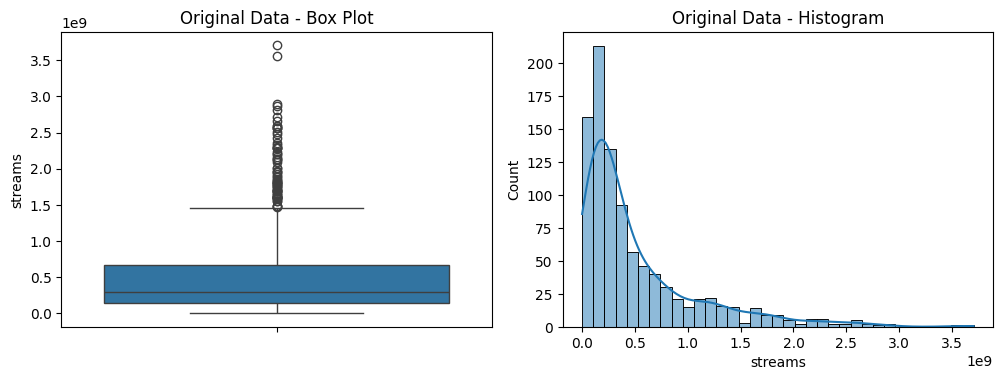

In [96]:
# Plot settings
plt.figure(figsize=(10, 7))

# Original Data Visualization
plt.subplot(2, 2, 1)
sns.boxplot(data=df["streams"])
plt.title('Original Data - Box Plot')

plt.subplot(2, 2, 2)
sns.histplot(data=df["streams"], kde=True)
plt.title('Original Data - Histogram')

# Show the plots
plt.tight_layout()
plt.show()

In [97]:
#scaling using the StandardScaler
scaler_standard = StandardScaler()
df['streams_standardized'] = scaler_standard.fit_transform(df[['streams']])

#Normalizing using the MinMaxScaller
scaler_normalize = MinMaxScaler()
df['streams_normalized'] = scaler_normalize.fit_transform(df[['streams']])



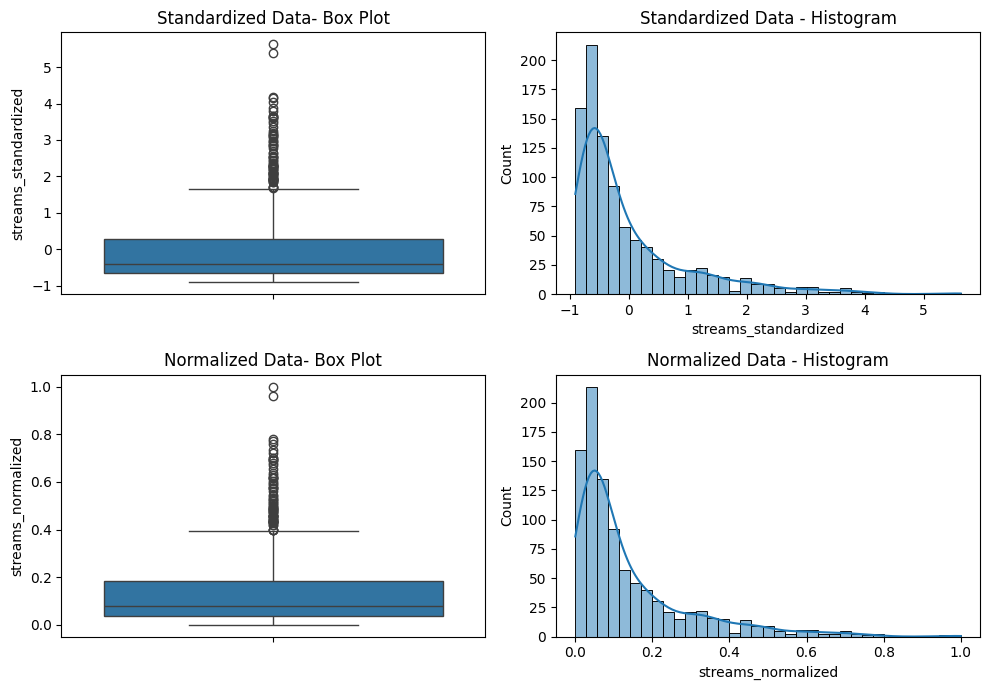

In [98]:
# Plot settings
plt.figure(figsize=(10, 7))

# Standardized Data Visualization
plt.subplot(2, 2, 1)
sns.boxplot(data=df["streams_standardized"])
plt.title('Standardized Data- Box Plot')

plt.subplot(2, 2, 2)
sns.histplot(data=df["streams_standardized"], kde=True)
plt.title('Standardized Data - Histogram')

# Normalized Data Data Visualization
plt.subplot(2, 2, 3)
sns.boxplot(data=df["streams_normalized"])
plt.title('Normalized Data- Box Plot')

plt.subplot(2, 2, 4)
sns.histplot(data=df["streams_normalized"], kde=True)
plt.title('Normalized Data - Histogram')

# Show the plots
plt.tight_layout()
plt.show()

Here we can see that the scaling **has not changed the data distribution** while it **changed the scale of distribution**

#### Encoding Categorical Variables

Categorical data often needs to be converted into a numerical format before it can be used in machine learning models.

Without encoding, the algorithms cannot process the categorical data and results in models that cannot be trained or that produce incorrect results.